# Presidential Election 2020 Voter Turnout Analysis
## CMSC 320 Fall 2020 Final Tutorial
## Robert Young 
## Table of Contents
* Introduction
* Data Collection
* Data Processing
* Data Analysis
* Data Visualization and Machine Learning
* Conclusion

## Introduction
The purpose of this tutorial is to draw conclusions on how voting was in this year's presidential election. I will apply the data lifecycle to data collected on general election 2020 voter turnout rates.

The presidential election happens every 4 years in the United States of America. It is a highly anticipated event by many Americans across the country. The two main candidates are either affiliated with the Democratic or Republican party. Two different votes are taken into account when deciding who will become the next president of the United States of America. The popular and electoral vote. Popular vote accounts for all the votes casted by eligible voters in each state. The electoral college is made up of electors who actually decide how to vote for their state. Republicans are represented as red and Democrats are represented as blue on the electoral college map. There are other political parties in the United States, but they tend to be irrelevant in most presidential elections. I will focus on popular vote in this tutorial. 

If you do not fully understand how the presidential election or electoral college works, I recommend you check out this <a href = "https://www.usa.gov/election#:~:text=Each%20elector%20casts%20one%20electoral,and%20are%20inaugurated%20in%20January"> link</a> that dives into this stuff in great detail. Unfortunately, I am not the best source of information when it comes to how political elections work in the United States of America. 

I got the data needed to perform this tutorial from Kaggle. The data is formatted in a CSV file named 2020 November General Election - Turnout Rates.csv. You can find this dataset on Kaggle's website at this <a href = "https://www.kaggle.com/imoore/2020-us-general-election-turnout-rates"> link</a>. 

The modules I used in this tutorial are numpy, pandas, seaborn, sklearn, matplotlib, and pyplot. The modules numpy and pandas are for data collection and processing. The modules seaborn, matplotlib, and pyplot are for creating and formating data plots. The module sklearn is for machine learning. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Data Collection
The dataset I am using has 52 rows and 12 columns. Each row represents a state, except for United States and District of Columbia. The rows are ordered alphabetically by state name. 

There are 12 different attributes for each state. The VEP Turnout Rate is the most important column for this tutorial's purpose. This dataset has a focus on showing voting eligibility for each state. 

I downloaded the CSV file from Kaggle into a folder with my tutorial. The person who scraped the data into the CSV file did a good job. I will transform the dataset into a pandas dataframe.

I decided to get rid of the source, official/unofficial, and overseas eligible columns to make things more clean and simple. I did this to remove unnecessary information from the table. The goal of this tutorial is to analyze voter turnout in the election. Thus these columns are not needed. I can also treat the United States and District of Columbia as states just for easier comparisons between other states.

In [2]:
voter_turnout_data = '2020 November General Election - Turnout Rates.csv'
voter_turnout_table = pd.read_csv(voter_turnout_data)
voter_turnout_table = voter_turnout_table.rename(columns = {'Total Ballots Counted (Estimate)': 'Ballot Count', 'Vote for Highest Office (President)': 'President Vote Count'})
voter_turnout_table.drop(columns = ['Source', 'Official/Unofficial', 'Overseas Eligible'], axis = 1, inplace = True)
voter_turnout_table.at[0, 'State Abv'] = 'US'
voter_turnout_table.head()

,State,Ballot Count,President Vote Count,VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,State Abv
0,United States,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457",US
1,Alabama,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",AL
2,Alaska,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",AK
3,Arizona,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",AZ
4,Arkansas,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",AR


The presidential election for this year was a little different in comparison to previous elections. There were in-person and mail-in ballots due to the coronavirus pandemic. This presented a lot of difficulty in ballot counting. It was so bad in some states that they decided to do ballot recounts and accept late mail-in ballots. These ballots allow an individual to vote for more than the president obviously. There are other things to vote for like senators and representatives. I am only going to focus on president votes. 

If you want to learn more about voter turnout for this year's presidential election, check out this <a href = "https://time.com/5907062/record-turnout-history/"> link</a>. 

## Data Processing
Lets begin by looking at how the voter eligible population turnout rates for each state. A good way to visualize this is through a bar plot. The bar plot has voter turnout on the y axis and each state on the x axis.  

<ipython-input-3-5978db61a5f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voter_turnout_table_new.sort_values(by = ['VEP Turnout Rate'], inplace = True, ascending = True)


Text(0.5, 1.0, 'The VEP Turnout Rates For Each State In The 2020 General Election')

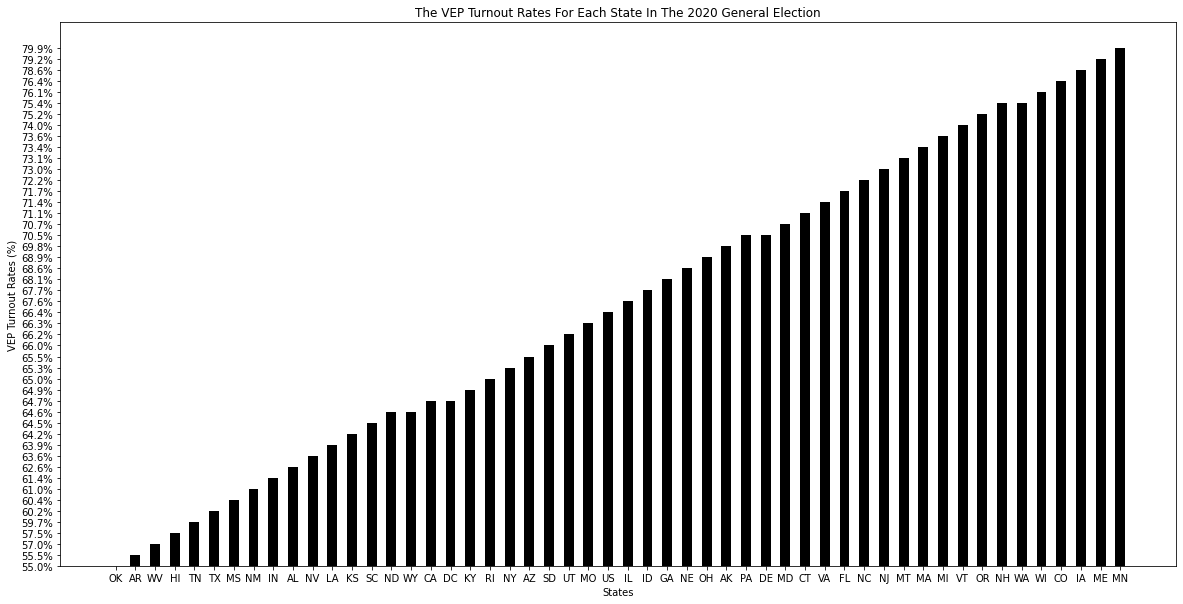

In [3]:
voter_turnout_table_new = voter_turnout_table[['State Abv', 'VEP Turnout Rate']]
voter_turnout_table_new.sort_values(by = ['VEP Turnout Rate'], inplace = True, ascending = True)
states = voter_turnout_table_new['State Abv']
vep_turnout_rates = voter_turnout_table_new['VEP Turnout Rate']
vep_turnout_rates_plot = plt.figure(figsize = (20, 10))
plt.bar(states, vep_turnout_rates, width = 0.5, color = 'Black')
plt.xlabel('States')
plt.ylabel('VEP Turnout Rates (%)')
plt.title('The VEP Turnout Rates For Each State In The 2020 General Election')

It is evident who has the lowest and highest VEP turnout rate. It is Oklahoma and  Minnesota respectively. This may be due to a variety of factors such as the number of mail-in ballots, the number of coronavirus cases, and population demographics. Population demographics are an indicator in how a state votes. A demographic that is always shined upon during every election is the youth population. The youth population is usually not going to have high voter turnout in comparison to other age populations. This can be due to the mentality that voting does not matter and the lack of understanding of voting in general. Georgia seems to be middle of the pack, but got there with a large amount of voter turnout coming from the young adult population this general election. If you want to learn more about this, take a look at this <a href = "https://time.com/5908483/georgia-youth-vote/"> link</a>.  

Lets follow up by taking a look at the eligibility to vote for each state. I will look at how many voting ineligible people there are in each state. I will use a bar plot again to visualize this. The bar plot has VIEP on the y axis and each state on the x axis. 

/root/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-4-a8deb5c52104>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voter_turnout_table_new_new['Voting-Ineligible Population (VIEP)'] = voter_turnout_table_new_new.apply(lambda row: int(row['Voting-Age Population (VAP)']) - int(row['Voting-Eligible Population (VEP)']), axis = 1)
/root/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy

Text(0.5, 1.0, 'The VIEP For Each State In The 2020 General Election')

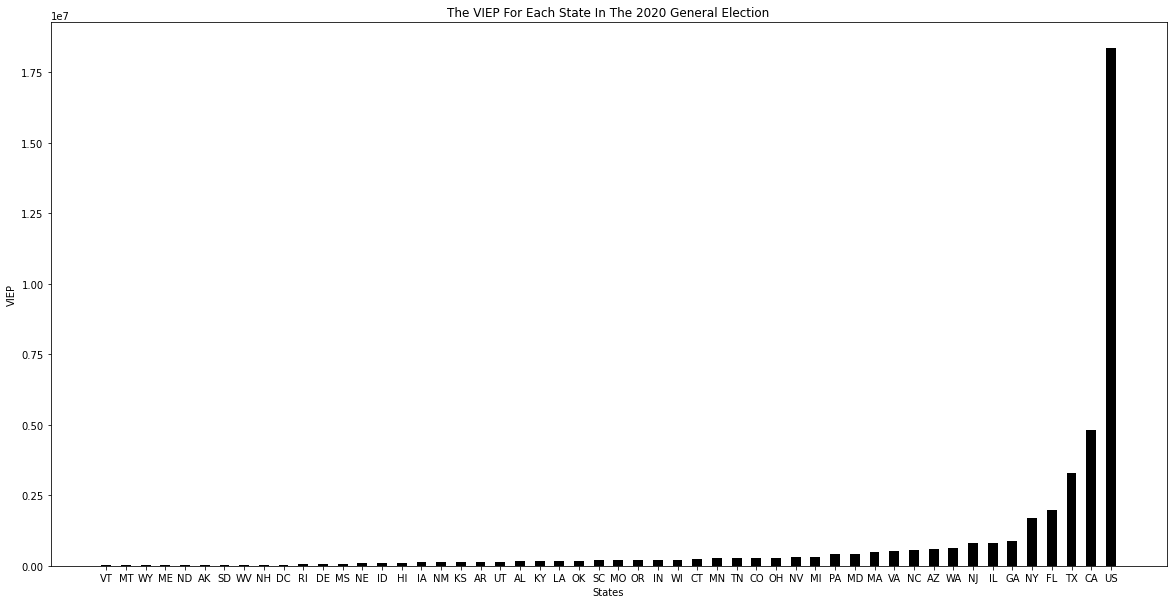

In [4]:
voter_turnout_table_new_new = voter_turnout_table[['State Abv', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)']]
voter_turnout_table_new_new.replace(',', '', regex = True, inplace = True)
voter_turnout_table_new_new['Voting-Ineligible Population (VIEP)'] = voter_turnout_table_new_new.apply(lambda row: int(row['Voting-Age Population (VAP)']) - int(row['Voting-Eligible Population (VEP)']), axis = 1)
voter_turnout_table_new_new.drop(columns = ['Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)'], axis = 1, inplace = True)
voter_turnout_table_new_new.sort_values(by = ['Voting-Ineligible Population (VIEP)'], inplace = True, ascending = True)
states = voter_turnout_table_new_new['State Abv']
vep_ineligible_population = voter_turnout_table_new_new['Voting-Ineligible Population (VIEP)']
vep_ineligible_population_plot = plt.figure(figsize = (20, 10))
plt.bar(states, vep_ineligible_population, width = 0.5, color = 'Black')
plt.xlabel('States')
plt.ylabel('VIEP')
plt.title('The VIEP For Each State In The 2020 General Election')

The obvious trend here is that states with a higher population are going to have a higher voter ineligible population. There are some states that have a lower population and a higher voter ineligible population. States like Louisiana and New Jersey. If you would like to learn more about what causes an individual to not be able to vote, go to this <a href = "https://www.usa.gov/who-can-vote"> link</a>. 
## Data Analysis
Ealier I said that every state has a set of attributes that are related to voting in this year's general election. I can categorize some of these attributes by grouping them together. I created some new columns that reflect this grouping. 

The attributes prison, probation, parole, and total ineligible felon can be combined into a single column called ineligible crime committers. This would not apply to all states due to some states being lenient. For the purposes of this tutorial, I am going to assume that any consequences put on an individual due to crimes at the time of the election causes someone to be ineligible to vote. 

In [5]:
ineligible_crime_committers = ['Prison', 'Probation', 'Parole', 'Total Ineligible Felon']
voter_turnout_table_new_new_new = voter_turnout_table
voter_turnout_table_new_new_new.replace(',', '', regex = True, inplace = True)
voter_turnout_table_new_new_new['Ineligible Crime Committers'] = voter_turnout_table_new_new_new[ineligible_crime_committers].mean(axis = 1) 
voter_turnout_table_new_new_new = voter_turnout_table_new_new_new.drop(columns = ['Prison', 'Probation', 'Parole', 'Total Ineligible Felon'])
voter_turnout_table_new_new_new.sort_values(by = ['Ineligible Crime Committers'], inplace = True, ascending = False)
voter_turnout_table_new_new_new.head()

,State,Ballot Count,President Vote Count,VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,State Abv,Ineligible Crime Committers
0,United States,158835004,NaN,66.4%,239247182,257605088,7.8%,US,3.652685e+25
44,Texas,11300000,11231799,60.2%,18784280,22058260,12.6%,TX,3.872834e+22
11,Georgia,5025000,NaN,68.1%,7383562,8255108,6.6%,GA,1.273260e+21
10,Florida,11150000,NaN,71.7%,15551739,17543341,10.1%,FL,2.291855e+20
34,North Carolina,5600000,NaN,72.2%,7759051,8328642,5.7%,NC,8.410200e+18


I would like to see if there are any correlations between the VEP Turnout Rate and other attributes. I will accomplish this using a correlation heatmap. I will split the VEP turnout rates into separate ranges. These ranges are 55 - 60 %, 60 - 65 %, 65 - 70 %, 70 - 75 %, and 75 - 80 %.   

/root/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/root/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:title={'center':'Correlation Heatmap of VEP Turnout Rate and Ineligible Crime Committers'}>

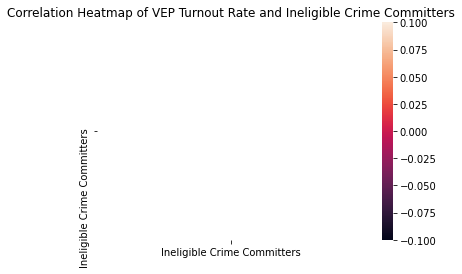

In [6]:
vep_turnout_55_60 = voter_turnout_table_new_new_new[voter_turnout_table_new_new_new['VEP Turnout Rate'].isin(range(55, 60))]
vep_turnout_60_65 = voter_turnout_table_new_new_new[voter_turnout_table_new_new_new['VEP Turnout Rate'].isin(range(60, 65))]
vep_turnout_65_70 = voter_turnout_table_new_new_new[voter_turnout_table_new_new_new['VEP Turnout Rate'].isin(range(65, 70))]
vep_turnout_70_75 = voter_turnout_table_new_new_new[voter_turnout_table_new_new_new['VEP Turnout Rate'].isin(range(70, 75))]
vep_turnout_75_80 = voter_turnout_table_new_new_new[voter_turnout_table_new_new_new['VEP Turnout Rate'].isin(range(75, 80))]
vep_turnout_ranges = [vep_turnout_55_60, vep_turnout_60_65, vep_turnout_65_70, vep_turnout_70_75, vep_turnout_75_80]
correlation = []
for table in vep_turnout_ranges:
    vep_turnout_ineligible_crime_committers_correlation = table[['State Abv', 'VEP Turnout Rate', 'Ineligible Crime Committers']]
    vep_turnout_ineligible_crime_committers_correlation = vep_turnout_ineligible_crime_committers_correlation.corr()
    correlation.append(vep_turnout_ineligible_crime_committers_correlation)
plt.title('Correlation Heatmap of VEP Turnout Rate and Ineligible Crime Committers')
sns.heatmap(correlation[0])

It is clearly shown in the correlation heatmap that there is a strong correlation between how many individuals are ineligible to vote and the voter turnout rate for each state. In the next section, I will try to create and train models that can accurately predict results.  
## Data Visualization and Machine Learning
I will be using Linear Discriminant Analysis from the sklearn module. LDA has assumptions that work well with my classification task. There are independent and a dependent variable. The independent variables are the voting attributes for each state like total ineligible felons and the dependent variable is the predicted category of a state in what their voter turnout looked like. 

Initially, I will split the table into features and labels. I will proceed to fit the model by splitting data into the training set and testing set. A test size of 0.5 will be used for this procedure.

In [8]:
voter_turnout_table.replace('%', '', regex = True, inplace = True)
features = voter_turnout_table.iloc[:, 10 : 11].to_numpy()
labels = voter_turnout_table.iloc[:, 3].to_numpy()
features_training, features_testing, labels_training, labels_testing = train_test_split(features, labels, test_size = 0.5)
LDA = LinearDiscriminantAnalysis()
LDA.fit(features_training, labels_training)
predictions = LDA.predict(features_testing) 
print('The accuracy of the model produced by Linear Discriminant Analysis is {}'.format(accuracy_score(labels_testing, predictions)))

The accuracy of the model produced by Linear Discriminant Analysis is 0.038461538461538464


## Conclusion
This tutorial should have given people an insight in how voting was in this year's election. I examined the voter turnout for each state and how different attributes go into explaining how a state voted. The focused on the popular vote because I wanted to look at voter turnout. I gave evidence that shows a correlation between voter turnout and voting ineligibility for some people. I did make some risky assumptions along the way, but you should still understand voter turnout statistics for the 2020 election. I believe I fulfilled my purpose that I stated at the beginning of this tutorial. 

There are a few things that I would like to do as an extension of this tutorial. I would like to relate these results to previous elections. This would bring about a whole new dimension of information to this topic. Another thing I would like to do is to see how certain demographics voted for different candidates in the voting eligible population. Finally, I would like to go into a lot of detail how mail-in ballots affected this year's election. 

I appreciate you greatly if you made it this far. Thank you for taking a look at this tutorial. I hope you learned something while reading.